# Question 04

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  

import warnings
warnings.simplefilter("ignore")

crs = ccrs.PlateCarree() 

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

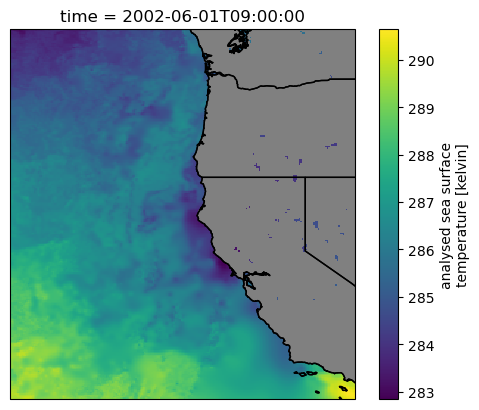

In [4]:
ds.analysed_sst[0, :, :].plot()

ax = plt.subplot(projection=crs)
ds.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))


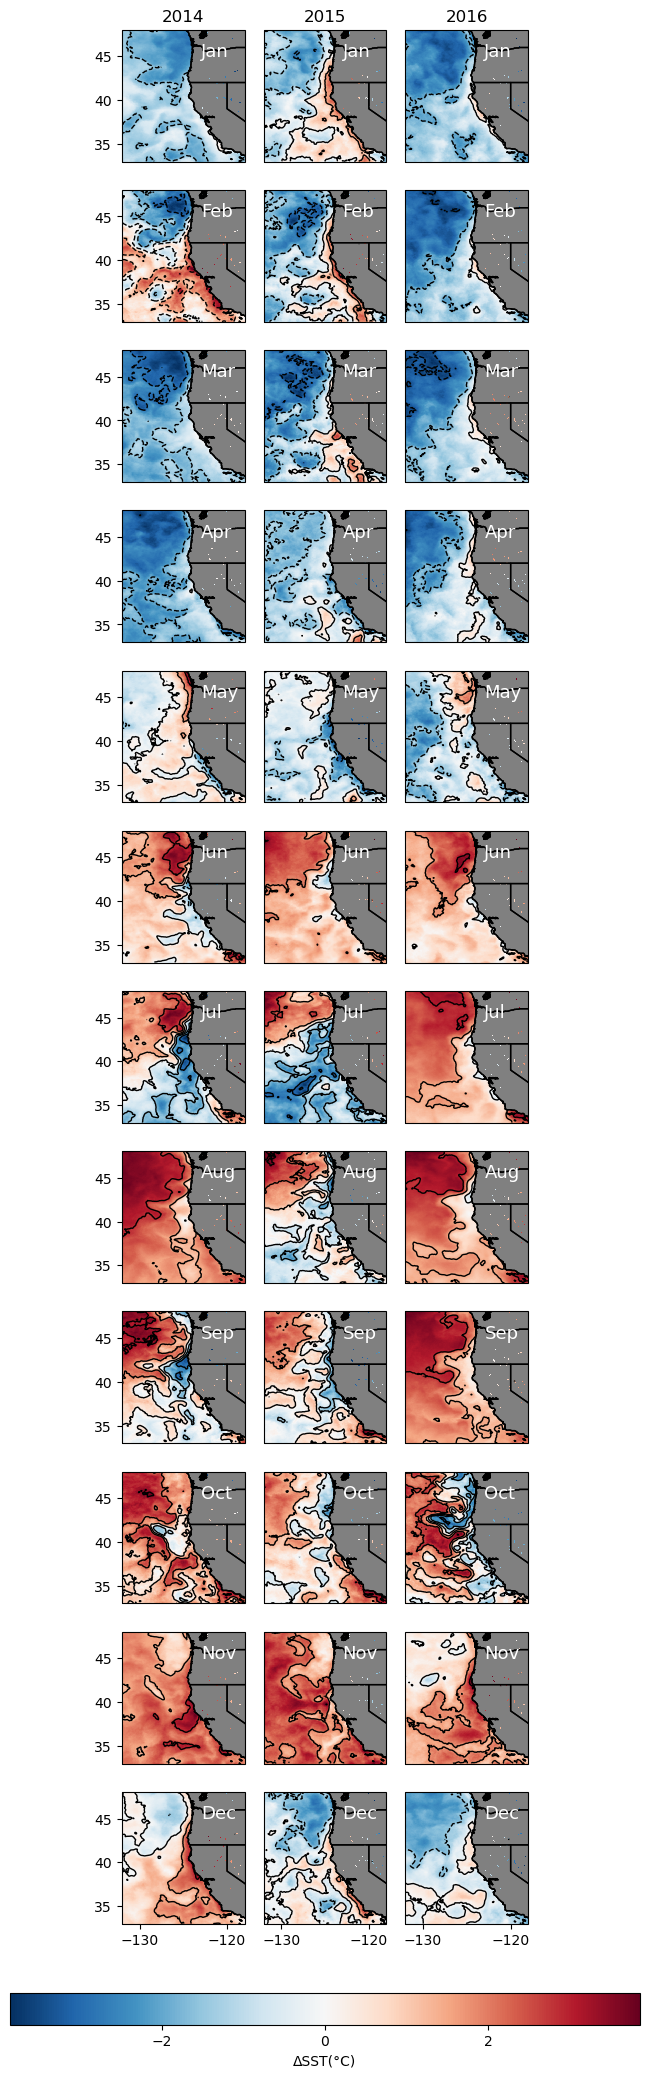

In [6]:
# SST anomolies
SST_anomolies = ds.analysed_sst - ds.analysed_sst.mean("time")

# create the grids (12 * 3)
figure, axis = plt.subplots(nrows=12, ncols=3, sharex=True, sharey=True,
                            subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(10, 30))

# create months
mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
         'Sep', 'Oct', 'Nov', 'Dec']

# for-loop to create each plot for 12 months for 3 years
for month in range(12):
    for year in range(3):

        # put time into style "2014-01"
        time = f"20{14 + year}-{month + 1:02d}"

        # color map & plot the graphs
        cmap = SST_anomolies.sel(time=time).mean("time").plot(ax=axis[month, year], transform=crs, cmap='RdBu_r', add_colorbar=False)

        # adding outline of the map
        SST_anomolies.sel(time=time).mean("time").plot.contour(ax=axis[month, year], colors='black', linewidths=1, cmin=-3, cmax=3)

        # adding features to the graph
        axis[month, year].coastlines("10m", color="k")
        axis[month, year].add_feature(cfeature.LAND, color="grey")
        axis[month, year].add_feature(cfeature.STATES.with_scale("10m"))

        # adding labels for each graphs
        if month == 0:
            axis[month, year].set_title(f"{time[:4]}")
        if year == 0:
            axis[month, year].set_yticks([35, 40, 45])
        if month == 11:
            axis[month, year].set_xticks([-130, -120])

        # adding month labels
        axis[month, year].text(-123, 45, mon[month], fontsize=13, color="white")
        axis[month, year].set(xlabel=None, ylabel=None)

# spacing
plt.subplots_adjust(left=0, hspace=.215, wspace=-.77)

# add color bar
colorBar = plt.colorbar(cmap, ax=axis, location='bottom', shrink=0.7, pad=0.03)
colorBar.set_label('ΔSST(°C)')
colorBar.set_ticks(range(-2, 3, 2))

plt.savefig('outputs/Question04.png')
plt.show()